<a href="https://colab.research.google.com/github/MoksedurRahman/Extract_table_From_Img_Doc_Colab/blob/main/Extract_table_From_Img_Doc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U layoutparser

     |████████████████████████████████| 19.2 MB 1.2 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 596 kB 51.5 MB/s 
     |████████████████████████████████| 5.6 MB 38.3 MB/s 
     |████████████████████████████████| 4.3 MB 61.2 MB/s 
     |████████████████████████████████| 139 kB 53.3 MB/s 
     |████████████████████████████████| 3.6 MB 39.5 MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.6.0-py3-none-any.whl size=33688 sha256=52f8f3dfb932dffefdcd6b00b918c7c75c9f0b09f6bfc82e740558df1c3dbcb3
  Stored in directory: /root/.cache/pip/wheels/58/56/fe/2e93d842ffa9ea97746c1ab253d43502ed61c0689361a0224e
Successfully built pdfplumber
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-m1ab21by/detectron2_1078bd8711e54a9c99836cbc6ceaa8ea
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-m1ab21by/detectron2_1078bd8711e54a9c99836cbc6ceaa8ea
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
     |████████████████████████████████| 47 kB 2.0 MB/s 
     |████████████████████████████████| 74 kB 2.0 MB/s 
     |████████████████████████████████| 112 kB 55.6 MB/s 
  Created wheel for detectron2: filename=detectron2-0.4-cp37-cp37m-linux_x86_64.whl size=5282423 sha256=a30b2c87257ed942243baacfaefd0f924f0794e58f5cc0804a186e2464ceb8e6
  Stored in directory: /tmp/pip-ephem-wheel-cache-tktkz87i/wheels/87/3f/26/dc45098d34763c9dc05ea3ab35c6dec6e9e8c16ac741efb741
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-py3-none-any.whl size=58542 sha256=b88ab8c84ef9d6d736b1a71e897c857386afd669b7f48d2be5586d26c

In [ ]:
!pip install layoutparser[ocr]

     |████████████████████████████████| 435 kB 5.2 MB/s 
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14070 sha256=d6b3cfdd07d62407400ff060c0d3cdeee92d41b0298f49825e64b3a8340c9389
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [ ]:
!git clone https://github.com/Layout-Parser/layout-parser.git

Cloning into 'layout-parser'...
remote: Enumerating objects: 1322, done.
remote: Counting objects: 100% (828/828), done.
remote: Compressing objects: 100% (458/458), done.
remote: Total 1322 (delta 474), reused 610 (delta 303), pack-reused 494
Receiving objects: 100% (1322/1322), 63.94 MiB | 29.10 MiB/s, done.
Resolving deltas: 100% (703/703), done.


In [ ]:
%cd layout-parser/

/content/layout-parser


In [ ]:
import cv2
image = cv2.imread("/content/layout-parser/examples/data/input_file_930119.jpg")
image = image[..., ::-1]

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:101: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


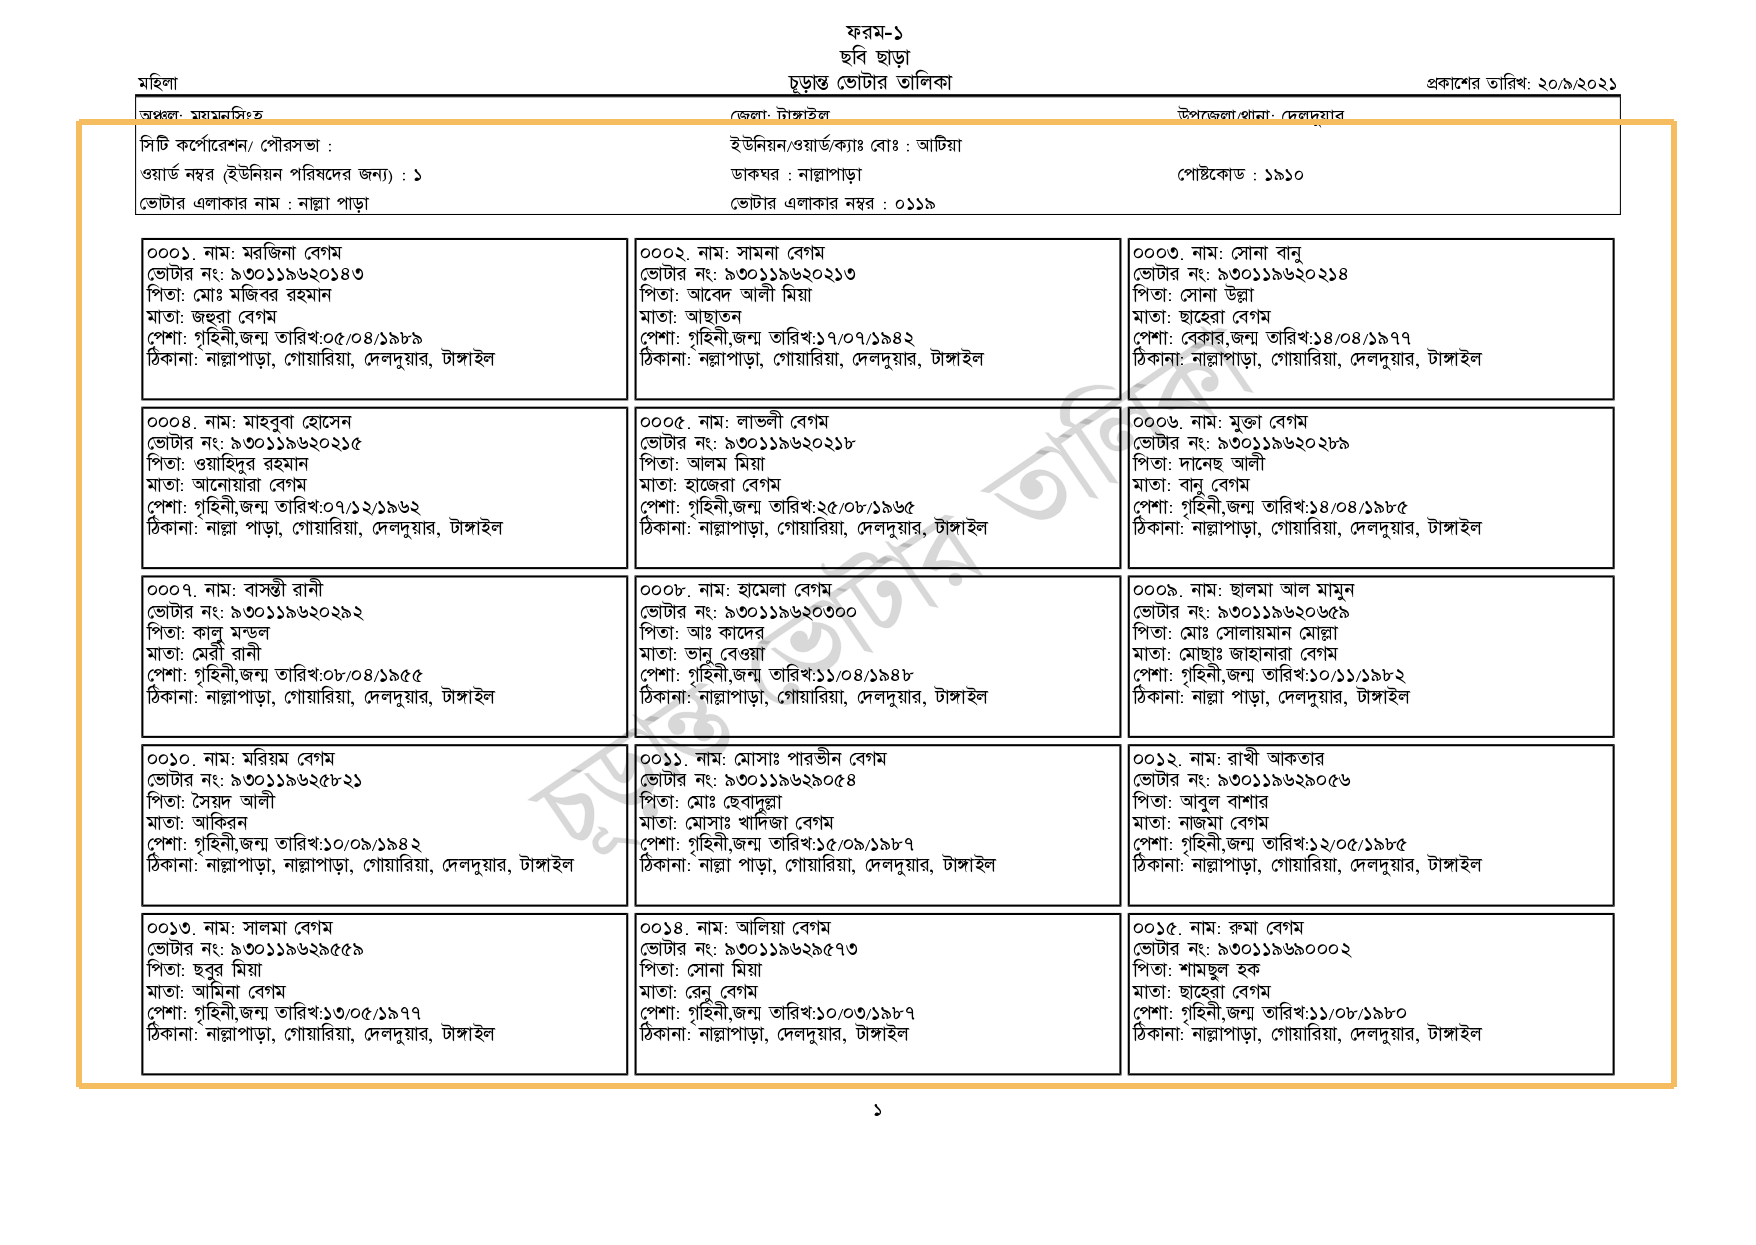

In [ ]:
import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout = model.detect(image) # You need to load the image somewhere else, e.g., image = cv2.imread(...)
lp.draw_box(image, layout,)

In [ ]:
text_blocks = lp.Layout([b for b in layout if b.type=="Table"])
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=79.38306427001953, y_1=121.03158569335938, x_2=1673.9451904296875, y_2=1086.0804443359375), text=None, id=None, type=Table, parent=None, next=None, score=0.9657491445541382)], page_data={})

In [ ]:
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [ ]:
figure_blocks

Layout(_blocks=[], page_data={})

In [ ]:
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [ ]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# And finally combine the two list and add the index
# according to the order
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

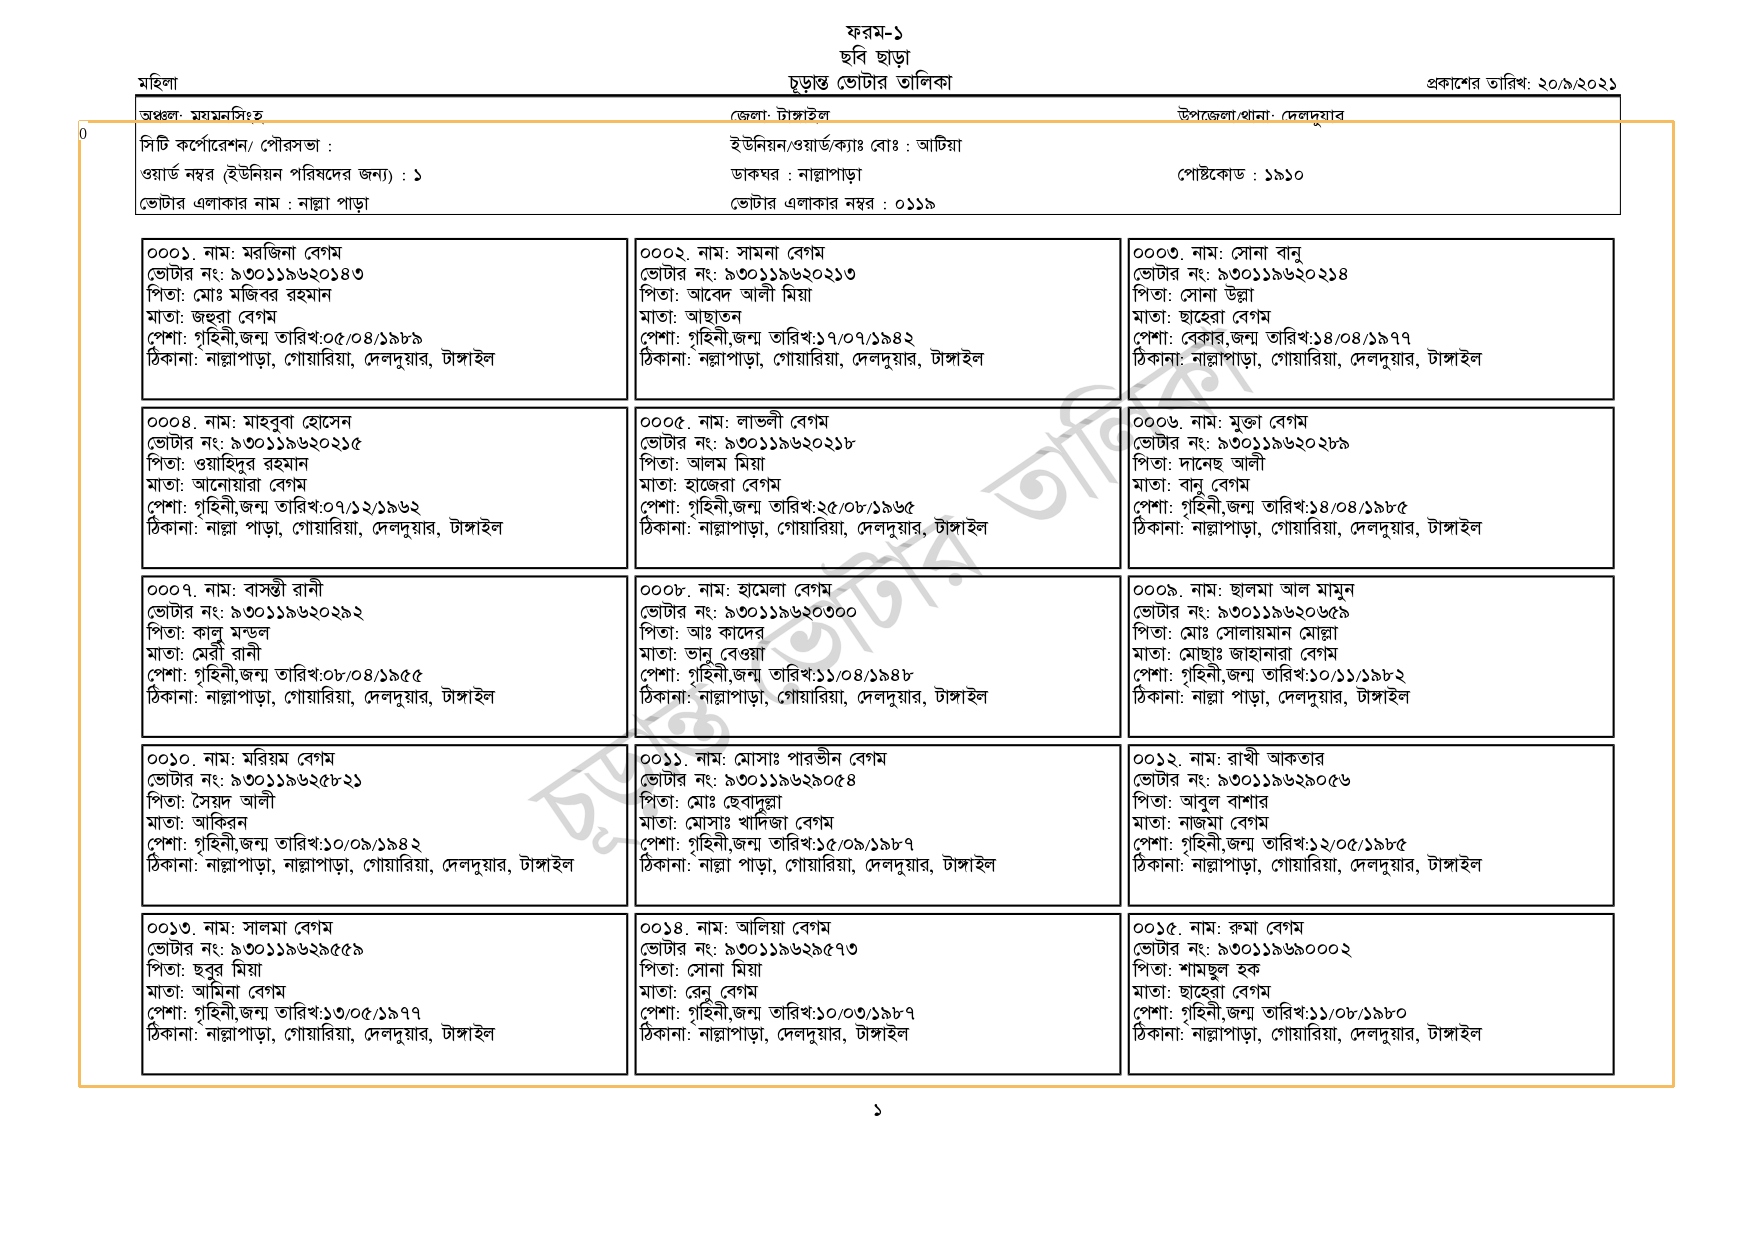

In [ ]:
lp.draw_box(image, text_blocks,
            box_width=3, 
            show_element_id=True)

In [ ]:
ocr_agent = lp.TesseractAgent(languages='ben') 
    # Initialize the tesseract ocr engine. You might need 
    # to install the OCR components in layoutparser:
    # pip install layoutparser[ocr]

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,385 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [34]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness 
        
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [35]:
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')

তাত পচ চি

'সিটি কর্পোরেশন/ পৌরসভা

ভার ₹₹৪ গত

ইউনিয়ন/ওয়ার্ড/ক্যাঃ বোঃ : আটিয়া

ঢা ৪ | দত ক জা

 

 

ওয়ার্ড নম্বর ইউনিয়ন পরিষদের জন্য) : ১ ডাকঘর : নাল্লাপাড়া পোষ্টকোড : ১৯১০
ভোটার এলাকার নাম : নাল্লা পাড়া ভোটার এলাকার নম্বর : ০১১৯

০০০১. নাম: মরজিনা বেগম ০০০২. নাম: সামনা বেগম ০০০৩. নাম: সোনা বানু
ভোটার নং: ৯৩০১১৯৬২০১৪৩ ভোটার নং: ৯৩০১১৯৬২০২১৩ নং: ৯৩০১১৯৬২০২১৪
পিতা: মোঃ মজিবর রহমান চা লীন পিতা: সোনা উল্লা

মাতা: জহুরা বেগম মাতা: ছাহেরা বেগম

পেশা: গৃহিনীজন্য 'তারিখ:০৫/০৪/১৯৮৯
ঠিকানা: নাল্লাপাড়া, গোয়ারিয়া, দেলদুয়ার, টাঙ্গাইল

লা, 'ৃহিদীজন্য তারিখ:১৭/০৭/১৯৪২
ঠিকানা: নল্লাপাড়া, গোয়ারিয়া, দেলদুয়ার, টাঙ্গাইল

পেশা: বেকার,জন্ম তারিখ:১৪/০৪/১৯৭৭

 

 

০০০৪. নাম: মাহবুবা হোসেন

ভোটার নং: ৯৩০১১৯৬২০২১৫

'পিতা: ওয়াহিদুর রহমান

মাতা: আনোয়ারা বেগম

পেশা: গৃহিনী,জন্ম তারিখ:০৭/১২/১৯৬২

ঠিকানা: নাল্লা পাড়া, গোয়ারিয়া, দেলদুয়ার, টাঙ্গাইল

 

০০০৫. নাম: লাভলী বেগম

ভোটার নং: ৯৩০১১৯৬২০২১৮

পিতা: আলম মিয়া

মাতা: হাজেরা বেগম

পেশা: গৃহিনী,জন্ম তারিখ:২৫/০৮/১৯৬৫

ঠিকানা: নাল্লাপাড়া, গোয

In [ ]:
text_blocks.get_texts()

[' \n\nDate Date Site\nPSU Ini- Date Ast lst ist Lot\nCASE NO Residence tials Age Sex Inoc Symp Para Para No Renarks\nCal-27 Los Angeles SG F419 4-27? LL £6037\nCal-28 Los Angeles MK M 4-22 5-2 None None 86037 GSF 1 cell, type 2 in stoc\n\n5-25 (Dr. Lennette)\n\nCal-29 Los Angeles OM Fo 4-22 5-2 2? LA £6037\nCal-30 Oakland DE Fo o&e19 4-29 5-6 Arms 2 @uadriplegia\nCal-31 Riverside = RA 7 M 4-22 5-6 None None E5928 CSF data not yet received\nCal-32 ie Angeles BB 7 M 4-20 5-3. None None E6037 CSF no cells, non-peralyt;\nGel-33 Long Beach DB 7 M 4-22 5-2 None None 786038 CSF date not yet received\nCal-34 Long Beach DA 7 M 4-22 5-11 None None ei CSF data not yet received\nAriz-l Maricopa LH 7 F 4-25 5-17 None None 785928 CSF 214 cells, non-perelyt\nVa-2 Falls Church RS 7 M 4-26 5-24 None None 8122-649334 CSF 23h cells, non~paralyt\nVa-3 Chase City MY 7 Mo 4-29 5-16 None None 8122-64933? CSF 39 cells, non-paralyti\nTex-13 Houston RR 7 M 4-19 5-12 None None 7078-64.9343 CSF 40 cells, nor—par

In [ ]:
for block in text_blocks:
  print(block)

TextBlock(block=Rectangle(x_1=27.745519638061523, y_1=249.892578125, x_2=1208.8997802734375, y_2=843.3308715820312), text= 

Date Date Site
PSU Ini- Date Ast lst ist Lot
CASE NO Residence tials Age Sex Inoc Symp Para Para No Renarks
Cal-27 Los Angeles SG F419 4-27? LL £6037
Cal-28 Los Angeles MK M 4-22 5-2 None None 86037 GSF 1 cell, type 2 in stoc

5-25 (Dr. Lennette)

Cal-29 Los Angeles OM Fo 4-22 5-2 2? LA £6037
Cal-30 Oakland DE Fo o&e19 4-29 5-6 Arms 2 @uadriplegia
Cal-31 Riverside = RA 7 M 4-22 5-6 None None E5928 CSF data not yet received
Cal-32 ie Angeles BB 7 M 4-20 5-3. None None E6037 CSF no cells, non-peralyt;
Gel-33 Long Beach DB 7 M 4-22 5-2 None None 786038 CSF date not yet received
Cal-34 Long Beach DA 7 M 4-22 5-11 None None ei CSF data not yet received
Ariz-l Maricopa LH 7 F 4-25 5-17 None None 785928 CSF 214 cells, non-perelyt
Va-2 Falls Church RS 7 M 4-26 5-24 None None 8122-649334 CSF 23h cells, non~paralyt
Va-3 Chase City MY 7 Mo 4-29 5-16 None None 8122-64933? CS

In [ ]:
!pip install spacy

In [ ]:
!pip install spacy-transformers
!python -m spacy download en_core_web_trf

     |████████████████████████████████| 51 kB 110 kB/s 
     |████████████████████████████████| 1.1 MB 10.2 MB/s 
     |████████████████████████████████| 6.0 MB 44.9 MB/s 
     |████████████████████████████████| 3.4 MB 43.4 MB/s 
     |████████████████████████████████| 451 kB 63.9 MB/s 
     |████████████████████████████████| 10.1 MB 43.7 MB/s 
     |████████████████████████████████| 628 kB 61.3 MB/s 
     |████████████████████████████████| 181 kB 73.5 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 895 kB 56.6 MB/s 
     |████████████████████████████████| 67 kB 4.6 MB/s 
     |████████████████████████████████| 3.3 MB 37.9 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0

In [ ]:
!pip install click==7.1.1

     |████████████████████████████████| 82 kB 765 kB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2


In [ ]:
import spacy
nlp = spacy.load("en_core_web_trf")

In [ ]:
sentence=["".join(txt) for txt in text_blocks.get_texts()]

In [ ]:
".".join(sentence)

' \n\nDate Date Site\nPSU Ini- Date Ast lst ist Lot\nCASE NO Residence tials Age Sex Inoc Symp Para Para No Renarks\nCal-27 Los Angeles SG F419 4-27? LL £6037\nCal-28 Los Angeles MK M 4-22 5-2 None None 86037 GSF 1 cell, type 2 in stoc\n\n5-25 (Dr. Lennette)\n\nCal-29 Los Angeles OM Fo 4-22 5-2 2? LA £6037\nCal-30 Oakland DE Fo o&e19 4-29 5-6 Arms 2 @uadriplegia\nCal-31 Riverside = RA 7 M 4-22 5-6 None None E5928 CSF data not yet received\nCal-32 ie Angeles BB 7 M 4-20 5-3. None None E6037 CSF no cells, non-peralyt;\nGel-33 Long Beach DB 7 M 4-22 5-2 None None 786038 CSF date not yet received\nCal-34 Long Beach DA 7 M 4-22 5-11 None None ei CSF data not yet received\nAriz-l Maricopa LH 7 F 4-25 5-17 None None 785928 CSF 214 cells, non-perelyt\nVa-2 Falls Church RS 7 M 4-26 5-24 None None 8122-649334 CSF 23h cells, non~paralyt\nVa-3 Chase City MY 7 Mo 4-29 5-16 None None 8122-64933? CSF 39 cells, non-paralyti\nTex-13 Houston RR 7 M 4-19 5-12 None None 7078-64.9343 CSF 40 cells, nor—pare

In [ ]:
doc = nlp(".".join(sentence))
for ent in doc.ents:
  print(ent.text,ent.label_)

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


1 CARDINAL
2 CARDINAL
2 CARDINAL
785928 CARDINAL
214 CARDINAL
